In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

In [2]:
def to_data_frame(X, y):
    df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
    df.columns = ['feature_1', 'feature_2', 'label']
    return df

def save_data_set(X, y, filename):
    df = to_data_frame(X,y)
    df.to_csv(filename, index=False, encoding='utf-8')
    
def make_balanced_data_set(seed):
    X, y = make_classification(n_samples=700, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1,
                               class_sep=1.0, flip_y=0.06, random_state=seed)
    return X, y

def make_imbalanced_data_set(X, y, seed):
    X_imb, y_imb = make_imbalance(X, y, sampling_strategy={0: 340, 1: 10}, random_state=seed)
    return X_imb, y_imb

def plot_data(X, y, title):
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.show()

    
def plot_decision_boundary(clf, df, title='Decision boundary'):

    X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
    y = df.label

    fig, ax = plt.subplots()
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title(title)
    plt.show()


In [3]:
# Create an imbalanced data set
seed = 123
X, y = make_balanced_data_set(seed)
X, y = make_imbalanced_data_set(X, y, seed)
save_data_set(X,y, 'imbalanced.csv')

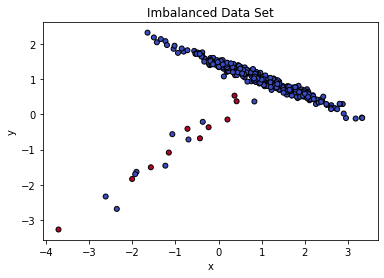

In [4]:
plot_data(X, y, 'Imbalanced Data Set')

In [5]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed, stratify=y)

In [6]:
#Train using the unbalanced data set
imbalanced_model = LogisticRegression()
imbalanced_model.fit(X, y)
imbalanced_pred =  imbalanced_model.predict(X)
pred_imbalanced = imbalanced_model.predict(X_test)
average_precision_score(y_test, pred_imbalanced)

0.34195402298850575

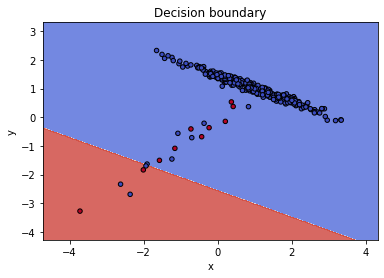

In [7]:
imbalanced = to_data_frame(X,y)
plot_decision_boundary(imbalanced_model, imbalanced)

In [8]:
#Generate a balanced data set using SMOTE
smoted = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=seed)
X_smoted, y_smoted = smoted.fit_resample(X_train, y_train)

In [9]:
#Train a model on the SMOTEd data set
smoted_model = LogisticRegression()
smoted_model.fit(X_smoted, y_smoted)
pred_smoted = smoted_model.predict(X_test)
average_precision_score(y_test, pred_smoted)

0.42857142857142855

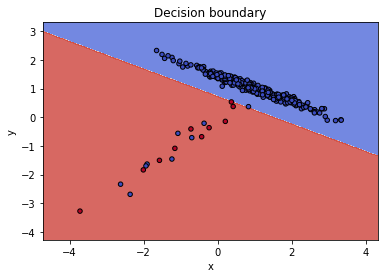

In [10]:
plot_decision_boundary(smoted_model, imbalanced)
